<span style="color:green;float:right">Homepage: https://spkit.github.io</span>
<br><span style="color:green;float:right">Nikesh Bajaj : http://nikeshbajaj.in</span>

# Decision Trees with visualization using SpKit

**Note**: This notebook covers the use of (1) Classification and (2) Regression Tree from ***spkit*** library with different verbosity mode while training and plotting resulting decision tree after training. We use two different datasets Iris and Breast Cancer for classification and Boston Housing price for Regression. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Import libraries</a></span></li></ul></li><li><span><a href="#Classification-Tree" data-toc-modified-id="Classification-Tree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification Tree</a></span><ul class="toc-item"><li><span><a href="#Iris-Dataset" data-toc-modified-id="Iris-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Iris Dataset</a></span><ul class="toc-item"><li><span><a href="#Fitting-a-model-(displaying-the-tree-building)-with-different-modes" data-toc-modified-id="Fitting-a-model-(displaying-the-tree-building)-with-different-modes-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Fitting a model (displaying the tree building) with different modes</a></span><ul class="toc-item"><li><span><a href="#verbose=0-(silence-mode)" data-toc-modified-id="verbose=0-(silence-mode)-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>verbose=0 (silence mode)</a></span></li><li><span><a href="#verbose=1-(progress-bar)" data-toc-modified-id="verbose=1-(progress-bar)-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>verbose=1 (progress bar)</a></span></li><li><span><a href="#verbose=2-(printing-tree-info)" data-toc-modified-id="verbose=2-(printing-tree-info)-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span>verbose=2 (printing tree info)</a></span></li><li><span><a href="#verbose=3-(printing-branches-only)" data-toc-modified-id="verbose=3-(printing-branches-only)-1.1.1.4"><span class="toc-item-num">1.1.1.4&nbsp;&nbsp;</span>verbose=3 (printing branches only)</a></span></li><li><span><a href="#verbose=4-(Plotting-tree..-while-building)" data-toc-modified-id="verbose=4-(Plotting-tree..-while-building)-1.1.1.5"><span class="toc-item-num">1.1.1.5&nbsp;&nbsp;</span>verbose=4 (Plotting tree.. while building)</a></span></li></ul></li><li><span><a href="#Plotting-the-resulting-tree" data-toc-modified-id="Plotting-the-resulting-tree-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Plotting the resulting tree</a></span></li><li><span><a href="#Plotting-Tree-with-same-color-branches" data-toc-modified-id="Plotting-Tree-with-same-color-branches-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Plotting Tree with same color branches</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li><li><span><a href="#Iris-data-with-smaller-tree" data-toc-modified-id="Iris-data-with-smaller-tree-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Iris data with smaller tree</a></span></li><li><span><a href="#Breast-Cancer-data" data-toc-modified-id="Breast-Cancer-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Breast Cancer data</a></span><ul class="toc-item"><li><span><a href="#Fitting-model-with-displaying-the-details-of-tree-in-process-(verbose=4)" data-toc-modified-id="Fitting-model-with-displaying-the-details-of-tree-in-process-(verbose=4)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Fitting model with displaying the details of tree in process (verbose=4)</a></span></li><li><span><a href="#Resulting-tree" data-toc-modified-id="Resulting-tree-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Resulting tree</a></span></li><li><span><a href="#Fitting-model-with-displaying-the-progress-only-(verbose=1)" data-toc-modified-id="Fitting-model-with-displaying-the-progress-only-(verbose=1)-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Fitting model with displaying the progress only (verbose=1)</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Predicting</a></span></li></ul></li></ul></li><li><span><a href="#Regression-Tree" data-toc-modified-id="Regression-Tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression Tree</a></span><ul class="toc-item"><li><span><a href="#Boston-House-price" data-toc-modified-id="Boston-House-price-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Boston House price</a></span></li><li><span><a href="#Ploting-resulting-tree" data-toc-modified-id="Ploting-resulting-tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ploting resulting tree</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Boston-Data-with-smaller-tree" data-toc-modified-id="Boston-Data-with-smaller-tree-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Boston Data with smaller tree</a></span></li></ul></li></ul></div>

### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import spkit

#version
# it is 0.0.9.1 version
spkit.__version__

'0.0.9'

In [3]:
np.random.seed(11) # just to makesure same results

In [4]:
# import Classification and Regression Tree from spkit
from spkit.ml import ClassificationTree, RegressionTree

# import dataset and train-test split from sklearn or use your own dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Classification Tree

### Iris Dataset

Loading and spliting for training and testing

In [5]:
data = datasets.load_iris()
X = data.data
y = data.target

feature_names = data.feature_names #Optional

Xt,Xs, yt, ys = train_test_split(X,y,test_size=0.3)

print(X.shape,y.shape, Xt.shape, yt.shape, Xs.shape, ys.shape)

(150, 4) (150,) (105, 4) (105,) (45, 4) (45,)


#### Fitting a model (displaying the tree building) with different modes

##### verbose=0 (silence mode)

In [6]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=0,feature_names=feature_names)

##### verbose=1 (progress bar)

In [50]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=1,feature_names=feature_names)

Number of features:: 4
Number of samples :: 105
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->||
|.........................tree is buit!
---------------------------------------


##### verbose=2 (printing tree info)

In [7]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=2,feature_names=feature_names)

Number of features:: 4
Number of samples :: 105
---------------------------------------
|Building the tree.....................
|-Feature::3_petal length (cm) Gain::0.93 thr::_Depth = 1   
|->False branch (<<<)..
|->{Leaf Node:: value: 0 }_Depth =2  

|
|->True branch (>>>)..
|--Feature::4_petal width (cm) Gain::0.81 thr::_Depth = 2    
|-->False branch (<<<)..
|--Feature::3_petal length (cm) Gain::0.18 thr::_Depth = 3   
|-->False branch (<<<)..
|-->{Leaf Node:: value: 1 }_Depth =4  

|
|-->True branch (>>>)..
|--->{Leaf Node:: value: 2 }_Depth =4  

|
|-->True branch (>>>)..
|---Feature::3_petal length (cm) Gain::0.1 thr::_Depth = 3    
|--->False branch (<<<)..
|---Feature::2_sepal width (cm) Gain::0.81 thr::_Depth = 4    
|--->False branch (<<<)..
|--->{Leaf Node:: value: 2 }_Depth =5  

|
|--->True branch (>>>)..
|---->{Leaf Node:: value: 1 }_Depth =5  

|
|--->True branch (>>>)..
|---->{Leaf Node:: value: 2 }_Depth =4  

|
|.........................tree is buit!
-----------------

##### verbose=3 (printing branches only)

In [8]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=3,feature_names=feature_names)

Number of features:: 4
Number of samples :: 105
---------------------------------------
|Building the tree.....................
None 1 | 
True 2 | T
True 3 | TT
True 4 | TTT
False 4 | TTTF
True 5 | TTTFT
False 5 | TTTFF
False 3 | TTF
True 4 | TTFT
False 4 | TTFF
False 2 | TF
|
|.........................tree is buit!
---------------------------------------


##### verbose=4 (Plotting tree.. while building)

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


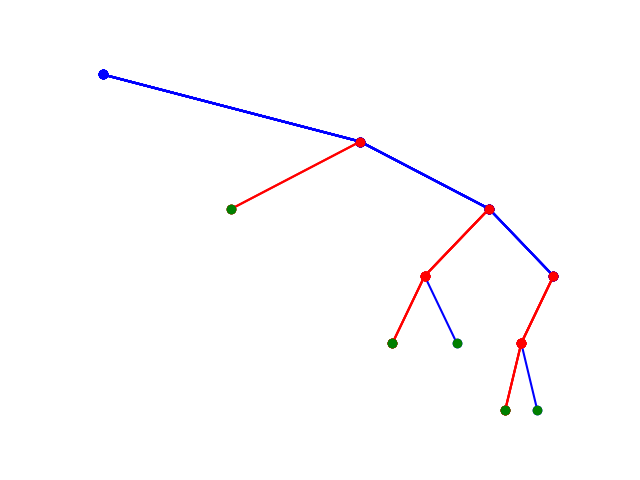

Number of features:: 4
Number of samples :: 105
---------------------------------------
|Building the tree.....................
|
|.........................tree is buit!
---------------------------------------


In [10]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=4,feature_names=feature_names)

#### Plotting the resulting tree

In [11]:
%matplotlib inline

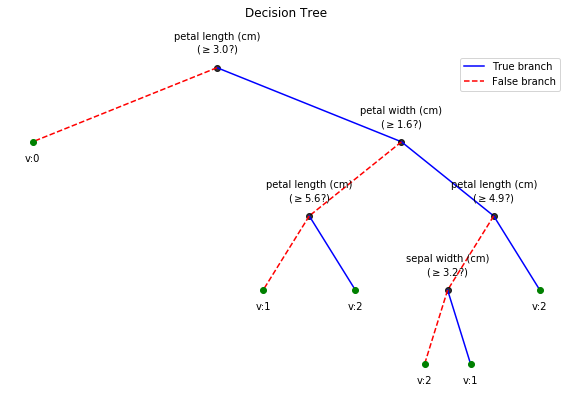

In [12]:
plt.figure(figsize=(10,6))
clf.plotTree(show=True,scale=False)

#### Plotting Tree with same color branches

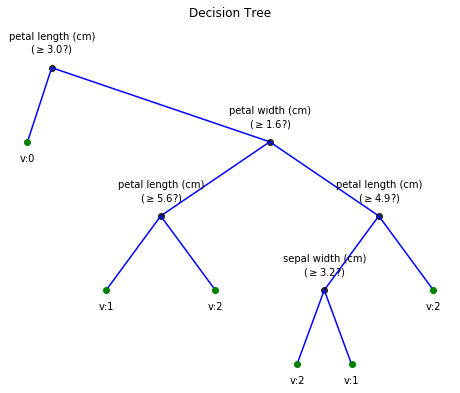

In [13]:
plt.figure(figsize=(8,6))
clf.plotTree(DiffBranchColor=False)

#### Predicting

In [14]:
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)


ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  4
Accuracy
- Training :  1.0
- Testing  :  0.9111111111111111
Logloss
- Training :  14.473392013068288
- Testing  :  15.350567286593632


### Iris data with smaller tree

Number of features:: 4
Number of samples :: 105
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->||
|.........................tree is buit!
---------------------------------------


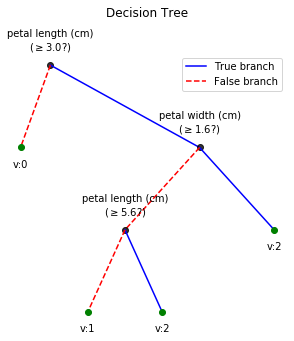

Depth of trained Tree  3
Accuracy
- Training :  0.9904761904761905
- Testing  :  0.8666666666666667
Logloss
- Training :  2.5937142862825335
- Testing  :  1.6081773385894438


In [15]:
clf = ClassificationTree(max_depth=3)
clf.fit(Xt,yt,verbose=1,feature_names=feature_names)
plt.figure(figsize=(5,5))
clf.plotTree(show=True,DiffBranchColor=True)
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

### Breast Cancer data 

In [16]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names #Optional

Xt,Xs, yt, ys = train_test_split(X,y,test_size=0.3)

print(X.shape,y.shape, Xt.shape, yt.shape, Xs.shape, ys.shape)

(569, 30) (569,) (398, 30) (398,) (171, 30) (171,)


#### Fitting model with displaying the details of tree in process (verbose=4)

**While building tree, To first choose True branch and then False set randomBranch=False**

<IPython.core.display.Javascript object>


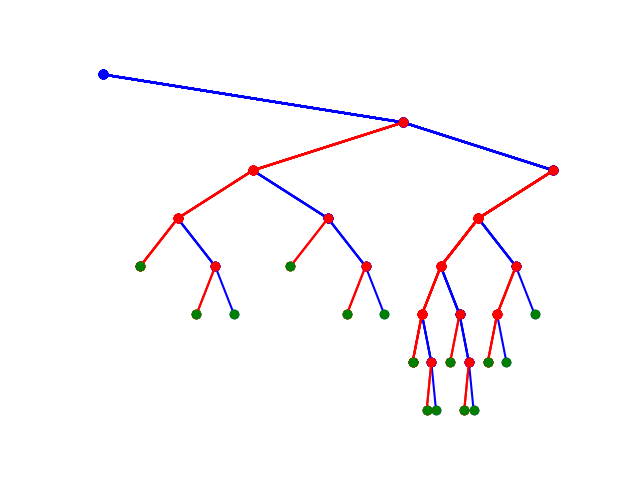

Number of features:: 30
Number of samples :: 398
---------------------------------------
|Building the tree.....................
|
|.........................tree is buit!
---------------------------------------


In [17]:
%matplotlib notebook
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=4,feature_names=feature_names,randomBranch=False)
plt.close(clf.fig)

**To randomly selevting True or False branch set randomBranch=True**

<IPython.core.display.Javascript object>


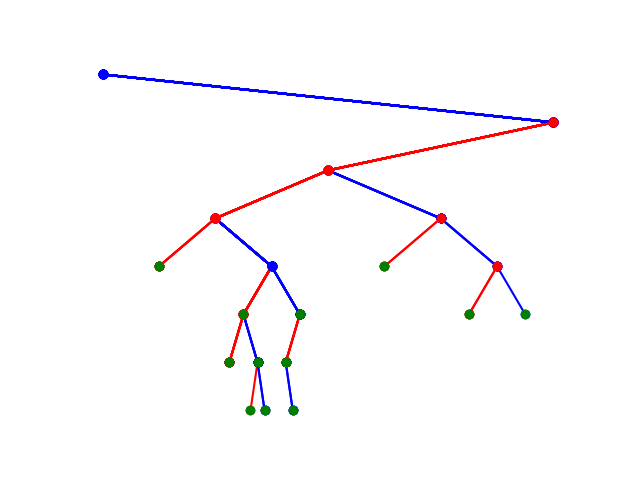

Number of features:: 30
Number of samples :: 398
---------------------------------------
|Building the tree.....................
|
|.........................tree is buit!
---------------------------------------


In [18]:
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=4,feature_names=feature_names,randomBranch=True)
plt.close(clf.fig)

#### Resulting tree

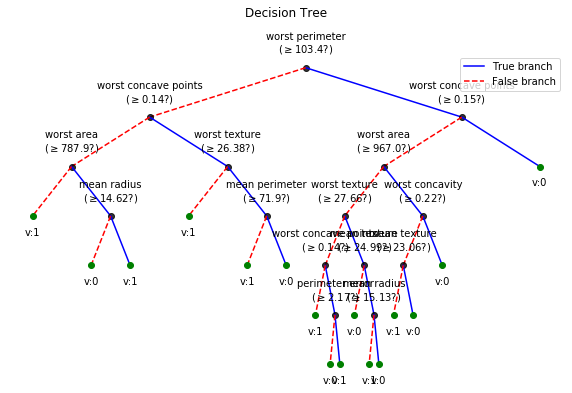

In [19]:
%matplotlib inline
plt.figure(figsize=(10,6))
clf.plotTree(show=True,DiffBranchColor=True,scale=False)
plt.close(clf.fig)

#### Fitting model with displaying the progress only (verbose=1)

Number of features:: 30
Number of samples :: 398
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->|-
|.........................tree is buit!
---------------------------------------


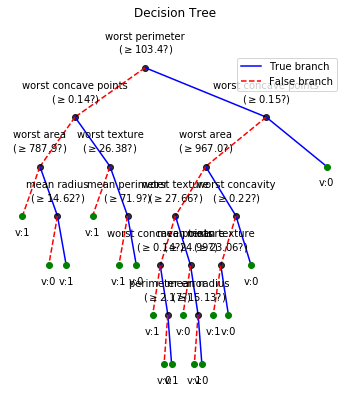

In [20]:
#%matplotlib inline
clf = ClassificationTree()
clf.fit(Xt,yt,verbose=1,feature_names=feature_names)

plt.figure(figsize=(6,6))
clf.plotTree()

#### Predicting

In [21]:
ytp = clf.predict(Xt)
ysp = clf.predict(Xs)

ytpr = clf.predict_proba(Xt)[:,1]
yspr = clf.predict_proba(Xs)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==yt))
print('- Testing  : ',np.mean(ysp==ys))
print('Logloss')
Trloss = -np.mean(yt*np.log(ytpr+1e-10)+(1-yt)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(ys*np.log(yspr+1e-10)+(1-ys)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Depth of trained Tree  6
Accuracy
- Training :  1.0
- Testing  :  0.9298245614035088
Logloss
- Training :  -1.000000082690371e-10
- Testing  :  1.6158491879730155


**It's overfitting, try with smaller trees by decresing the max_depth of classifier**

## Regression Tree

### Boston House price 

In [22]:
data = datasets.load_boston()
X = data.data
y = data.target

feature_names = data.feature_names #Optional

Xt,Xs, yt, ys = train_test_split(X,y,test_size=0.3)

print(X.shape,y.shape, Xt.shape, yt.shape, Xs.shape, ys.shape)

(506, 13) (506,) (354, 13) (354,) (152, 13) (152,)


In [23]:
rgr = RegressionTree()
rgr.fit(Xt,yt,verbose=1,feature_names = feature_names)

Number of features:: 13
Number of samples :: 354
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->|\
|.........................tree is buit!
---------------------------------------


### Ploting resulting tree

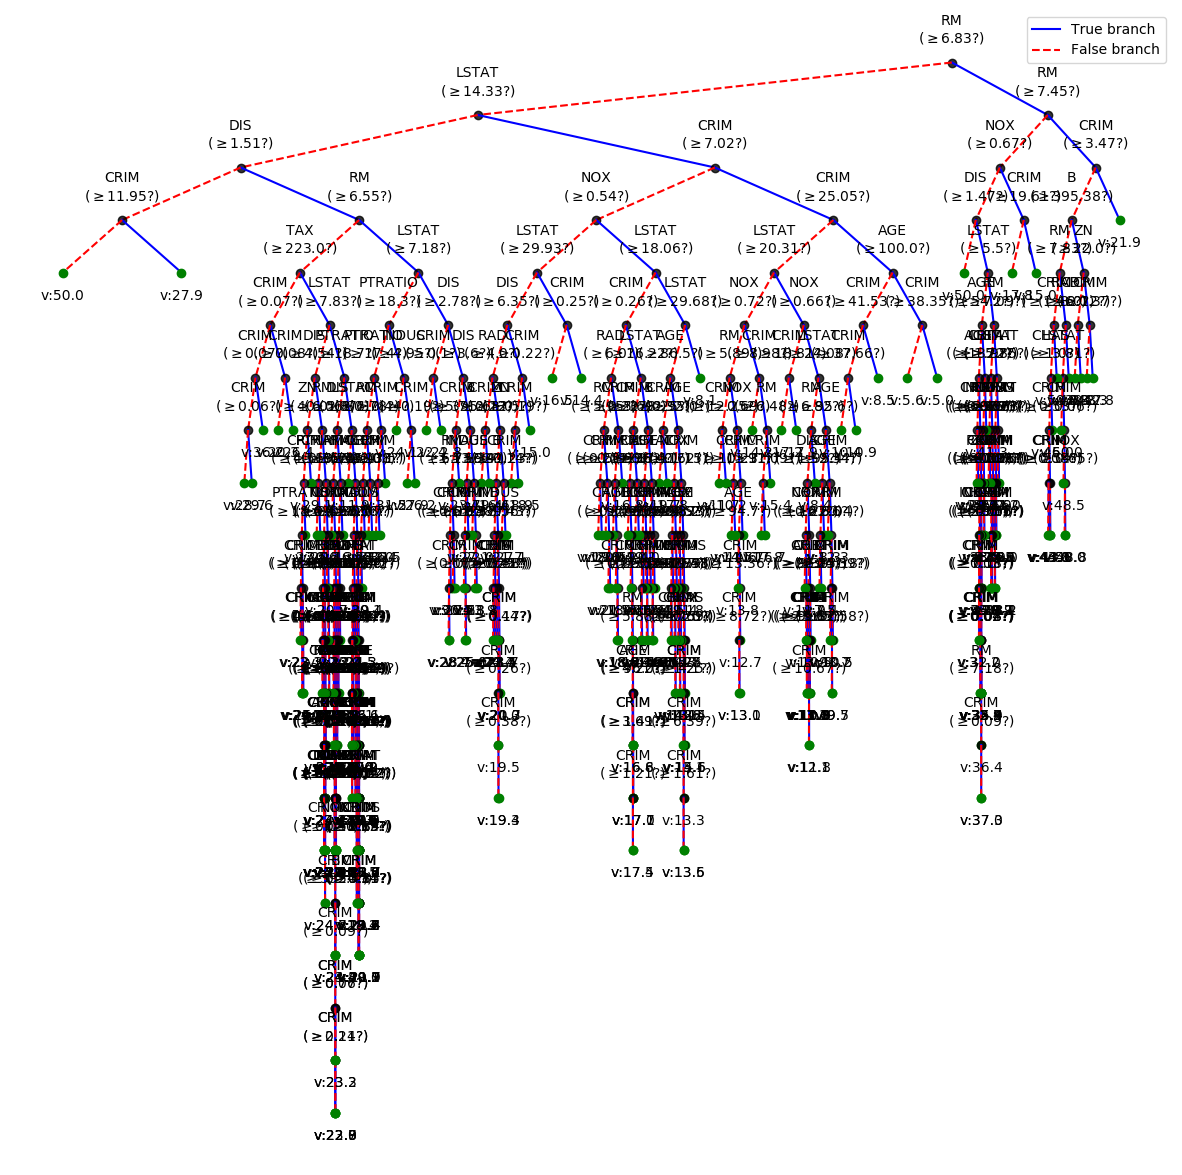

In [24]:
%matplotlib inline
plt.style.use('default')
plt.figure(figsize=(15,15))
rgr.plotTree(show=True,scale=True, showtitle =False, showDirection=False)

### Prediction

In [25]:
ytp = rgr.predict(Xt)
ysp = rgr.predict(Xs)
print('Training MSE: ',np.mean((ytp-yt)**2))
print('Testing  MSE: ',np.mean((ysp-ys)**2))

Training MSE:  0.0
Testing  MSE:  15.329736842105262


### Boston Data with smaller tree

In [26]:
rgr = RegressionTree(max_depth=4)
rgr.fit(Xt,yt,verbose=1,feature_names = feature_names)

Number of features:: 13
Number of samples :: 354
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->|\
|.........................tree is buit!
---------------------------------------


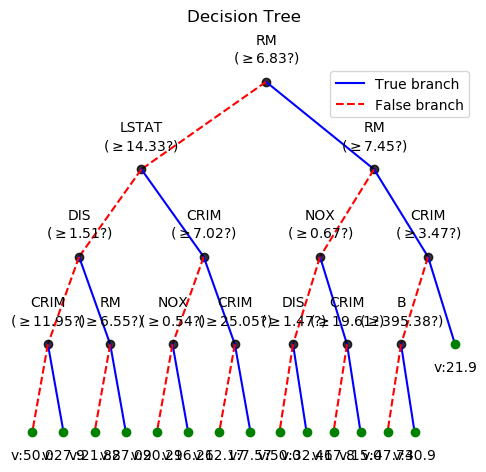

Training MSE:  8.833248184343507
Testing  MSE:  17.31131839344341


In [27]:
%matplotlib inline
plt.style.use('default')

plt.figure(figsize=(6,5))
rgr.plotTree(show=True,scale=True, showtitle =True, showDirection=False,DiffBranchColor=True)

ytp = rgr.predict(Xt)
ysp = rgr.predict(Xs)
print('Training MSE: ',np.mean((ytp-yt)**2))
print('Testing  MSE: ',np.mean((ysp-ys)**2))